#Part 1
####1.1
The main goal of the first code is to explore the relationship between the percentage change in the price of stocks and the volume of trades.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the CSV file into a DataFrame
data_frame = pd.read_csv('top100.csv')
data_frame

,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Stock Name,Date,Open,Close,High,Low,Volume
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAPL,2022-01-10 05:00:00,169.0800,172.19,172.5000,168.1700,106754551.0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,AAPL,2022-01-11 05:00:00,172.3200,175.08,175.1800,170.8200,76138312.0
2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,AAPL,2022-01-12 05:00:00,176.1200,175.53,177.1800,174.8200,74805173.0
3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,AAPL,2022-01-13 05:00:00,175.7800,172.19,176.6200,171.7900,84405760.0
4,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,AAPL,2022-01-14 05:00:00,171.3400,173.07,173.7800,171.0900,80440778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24844,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VYM,2023-01-03 05:00:00,108.5200,108.02,108.8000,107.2000,2377721.0
24845,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VYM,2023-01-04 05:00:00,108.3200,108.94,109.5000,108.0300,7427816.0
24846,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VYM,2023-01-05 05:00:00,108.4881,108.39,108.7500,107.8209,1829917.0
24847,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VYM,2023-01-06 05:00:00,109.2900,110.77,111.0500,109.0900,1624080.0


In [ ]:
#Data cleaning
data_frame = data_frame.drop(columns=['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])
data_frame

,Stock Name,Date,Open,Close,High,Low,Volume
0,AAPL,2022-01-10 05:00:00,169.0800,172.19,172.5000,168.1700,106754551.0
1,AAPL,2022-01-11 05:00:00,172.3200,175.08,175.1800,170.8200,76138312.0
2,AAPL,2022-01-12 05:00:00,176.1200,175.53,177.1800,174.8200,74805173.0
3,AAPL,2022-01-13 05:00:00,175.7800,172.19,176.6200,171.7900,84405760.0
4,AAPL,2022-01-14 05:00:00,171.3400,173.07,173.7800,171.0900,80440778.0
...,...,...,...,...,...,...,...
24844,VYM,2023-01-03 05:00:00,108.5200,108.02,108.8000,107.2000,2377721.0
24845,VYM,2023-01-04 05:00:00,108.3200,108.94,109.5000,108.0300,7427816.0
24846,VYM,2023-01-05 05:00:00,108.4881,108.39,108.7500,107.8209,1829917.0
24847,VYM,2023-01-06 05:00:00,109.2900,110.77,111.0500,109.0900,1624080.0


In [ ]:
# Standardize the date format from "%Y-%m-%d %H:%M:%S" to "%d/%m/%Y"
original_fmt = '%Y-%m-%d %H:%M:%S'
data_frame['Date'] = pd.to_datetime(data_frame['Date'], format=original_fmt)
new_fmt = '%d/%m/%Y'
data_frame['Date'] = data_frame['Date'].dt.strftime(new_fmt)

In [ ]:
#Use the stock name as index
data_frame.set_index('Stock Name', inplace=True)
data_frame

,Date,Open,Close,High,Low,Volume
Stock Name,,,,,,
AAPL,10/01/2022,169.0800,172.19,172.5000,168.1700,106754551.0
AAPL,11/01/2022,172.3200,175.08,175.1800,170.8200,76138312.0
AAPL,12/01/2022,176.1200,175.53,177.1800,174.8200,74805173.0
AAPL,13/01/2022,175.7800,172.19,176.6200,171.7900,84405760.0
AAPL,14/01/2022,171.3400,173.07,173.7800,171.0900,80440778.0
...,...,...,...,...,...,...
VYM,03/01/2023,108.5200,108.02,108.8000,107.2000,2377721.0
VYM,04/01/2023,108.3200,108.94,109.5000,108.0300,7427816.0
VYM,05/01/2023,108.4881,108.39,108.7500,107.8209,1829917.0


In [ ]:
#Add the "percentage change" column in the dataframe
data_frame['Percentage Change'] = ((data_frame['Close'] - data_frame['Open']) / data_frame['Open']) * 100
data_frame

,Date,Open,Close,High,Low,Volume,Percentage Change
Stock Name,,,,,,,
AAPL,10/01/2022,169.0800,172.19,172.5000,168.1700,106754551.0,1.839366
AAPL,11/01/2022,172.3200,175.08,175.1800,170.8200,76138312.0,1.601671
AAPL,12/01/2022,176.1200,175.53,177.1800,174.8200,74805173.0,-0.334999
AAPL,13/01/2022,175.7800,172.19,176.6200,171.7900,84405760.0,-2.042326
AAPL,14/01/2022,171.3400,173.07,173.7800,171.0900,80440778.0,1.009688
...,...,...,...,...,...,...,...
VYM,03/01/2023,108.5200,108.02,108.8000,107.2000,2377721.0,-0.460745
VYM,04/01/2023,108.3200,108.94,109.5000,108.0300,7427816.0,0.572378
VYM,05/01/2023,108.4881,108.39,108.7500,107.8209,1829917.0,-0.090425


In [ ]:
# Calculate and print the correlation between Percentage change and volume
correlation = data_frame['Percentage Change'].corr(data_frame['Volume'])

print(f"The correlation between percentage price change and volume is {correlation}")

The correlation between percentage price change and volume is 0.02101065709169928


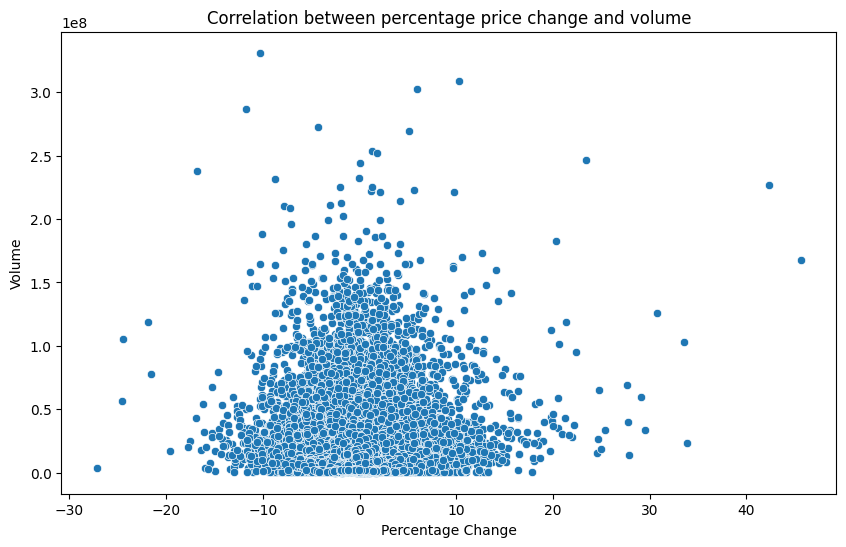

In [ ]:
#Draw a scatter plot
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Percentage Change', y='Volume', data=data_frame)
plt.title('Correlation between percentage price change and volume')
plt.show()

####1.2
The main goal of the second code is to cluster stocks based on their features (including percentage change) and possibly discover patterns among stocks within the same cluster.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the CSV file into a DataFrame
data_frame = pd.read_csv('top100.csv')

In [ ]:
#Data cleaning
data_frame = data_frame.drop(columns=['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])
data_frame

,Stock Name,Date,Open,Close,High,Low,Volume
0,AAPL,2022-01-10 05:00:00,169.0800,172.19,172.5000,168.1700,106754551.0
1,AAPL,2022-01-11 05:00:00,172.3200,175.08,175.1800,170.8200,76138312.0
2,AAPL,2022-01-12 05:00:00,176.1200,175.53,177.1800,174.8200,74805173.0
3,AAPL,2022-01-13 05:00:00,175.7800,172.19,176.6200,171.7900,84405760.0
4,AAPL,2022-01-14 05:00:00,171.3400,173.07,173.7800,171.0900,80440778.0
...,...,...,...,...,...,...,...
24844,VYM,2023-01-03 05:00:00,108.5200,108.02,108.8000,107.2000,2377721.0
24845,VYM,2023-01-04 05:00:00,108.3200,108.94,109.5000,108.0300,7427816.0
24846,VYM,2023-01-05 05:00:00,108.4881,108.39,108.7500,107.8209,1829917.0
24847,VYM,2023-01-06 05:00:00,109.2900,110.77,111.0500,109.0900,1624080.0


In [ ]:
# Standardize the date format from "%Y-%m-%d %H:%M:%S" to "%d/%m/%Y"
original_fmt = '%Y-%m-%d %H:%M:%S'
data_frame['Date'] = pd.to_datetime(data_frame['Date'], format=original_fmt)
new_fmt = '%d/%m/%Y'
data_frame['Date'] = data_frame['Date'].dt.strftime(new_fmt)
data_frame

,Stock Name,Date,Open,Close,High,Low,Volume
0,AAPL,10/01/2022,169.0800,172.19,172.5000,168.1700,106754551.0
1,AAPL,11/01/2022,172.3200,175.08,175.1800,170.8200,76138312.0
2,AAPL,12/01/2022,176.1200,175.53,177.1800,174.8200,74805173.0
3,AAPL,13/01/2022,175.7800,172.19,176.6200,171.7900,84405760.0
4,AAPL,14/01/2022,171.3400,173.07,173.7800,171.0900,80440778.0
...,...,...,...,...,...,...,...
24844,VYM,03/01/2023,108.5200,108.02,108.8000,107.2000,2377721.0
24845,VYM,04/01/2023,108.3200,108.94,109.5000,108.0300,7427816.0
24846,VYM,05/01/2023,108.4881,108.39,108.7500,107.8209,1829917.0
24847,VYM,06/01/2023,109.2900,110.77,111.0500,109.0900,1624080.0


In [ ]:
#Use the stock name as index
data_frame.set_index('Stock Name', inplace=True)

In [ ]:
# Select only the technology and consumer goods stocks
data_frame_t = data_frame.transpose()
tech_stocks=['AAPL','AMZN','MSFT','SNAP','HOOD','GOOG','PTON','TSLA','F','NVDA','GOOGL','PLTR','AMD','SQ','SOFI','QS']
consumer_stocks=['WMT','DIS','NKE','KO','TGT','CCL','SBUX','DAL','MRO','JBLU','RCL','LUV']
combined = tech_stocks + consumer_stocks
data_combined = data_frame_t[combined]
data_combined = data_combined.drop('Date')
data_combined = data_combined.transpose()
data_combined

,Open,Close,High,Low,Volume
Stock Name,,,,,
AAPL,169.08,172.19,172.5,168.17,106754551.0
AAPL,172.32,175.08,175.18,170.82,76138312.0
AAPL,176.12,175.53,177.18,174.82,74805173.0
AAPL,175.78,172.19,176.62,171.79,84405760.0
AAPL,171.34,173.07,173.78,171.09,80440778.0
...,...,...,...,...,...
LUV,33.82,32.6,34.07,32.105,11467617.0
LUV,32.75,33.62,34.035,32.7,8497301.0
LUV,33.25,33.53,33.835,33.25,5207998.0


In [ ]:
# Calculate the percentage change between the opening and closing prices
data_combined['Percentage Change'] = ((data_combined['Close'] - data_combined['Open']) / data_combined['Open']) * 100

In [ ]:
#Create a column with the sector name of each stock
data_combined['Sector'] = ''

# Assign the value 'Tech' to consumer_stocks
data_combined.loc[tech_stocks, 'Sector'] = 'Tech'

# Assign the value 'Consumer' to consumer_stocks
data_combined.loc[consumer_stocks, 'Sector'] = 'Consumer'
data_combined

,Open,Close,High,Low,Volume,Percentage Change,Sector
Stock Name,,,,,,,
AAPL,169.08,172.19,172.5,168.17,106754551.0,1.839366,Tech
AAPL,172.32,175.08,175.18,170.82,76138312.0,1.601671,Tech
AAPL,176.12,175.53,177.18,174.82,74805173.0,-0.334999,Tech
AAPL,175.78,172.19,176.62,171.79,84405760.0,-2.042326,Tech
AAPL,171.34,173.07,173.78,171.09,80440778.0,1.009688,Tech
...,...,...,...,...,...,...,...
LUV,33.82,32.6,34.07,32.105,11467617.0,-3.607333,Consumer
LUV,32.75,33.62,34.035,32.7,8497301.0,2.656489,Consumer
LUV,33.25,33.53,33.835,33.25,5207998.0,0.842105,Consumer


In [ ]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_combined.iloc[:, :-1])  #(exclude the last column 'Sector')
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5
count,7028.000000,7.028000e+03,7.028000e+03,7.028000e+03,7.028000e+03,7.028000e+03
mean,0.000000,-1.941153e-16,-8.088136e-17,1.779390e-16,6.470509e-17,2.527542e-18
std,1.000071,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.048544,-1.048899e+00,-1.049606e+00,-1.048086e+00,-9.499225e-01,-7.499993e+00
25%,-0.912132,-9.130665e-01,-9.114351e-01,-9.147733e-01,-7.221483e-01,-5.278837e-01
50%,-0.257520,-2.566524e-01,-2.597061e-01,-2.539667e-01,-3.868227e-01,2.856760e-03
75%,0.613290,6.093585e-01,6.100296e-01,6.165124e-01,4.419603e-01,4.959961e-01
max,3.869066,3.915189e+00,3.856375e+00,3.746253e+00,8.985108e+00,8.524605e+00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

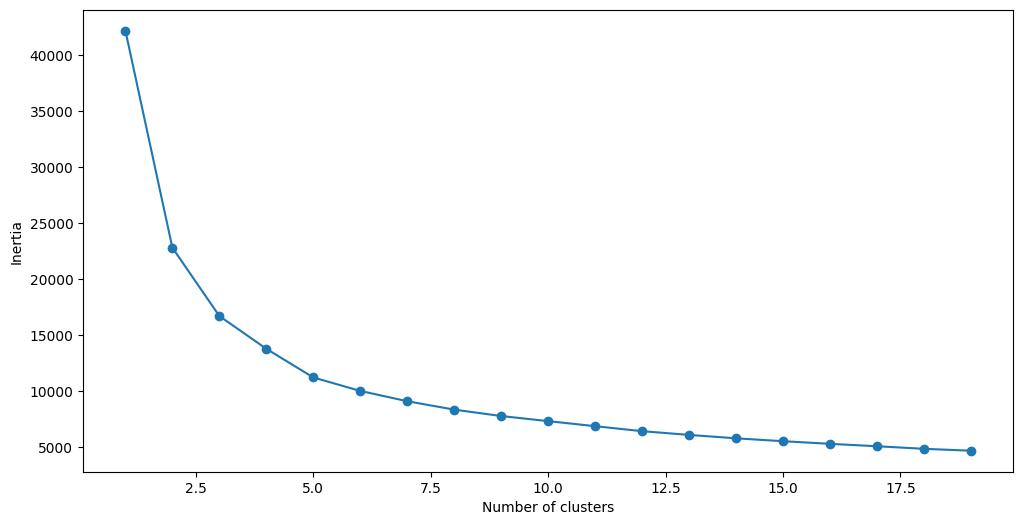

In [ ]:
##Elbow Method

# Fit multiple K-means algorithms and store the values in an empty list
sse_list = []
for num_clusters in range(1, 20):
    k_means = KMeans(n_clusters=num_clusters, init='k-means++')
    k_means.fit(data_scaled)
    sse_list.append(k_means.inertia_)

# Convert the results into a dataframe and plot them
sse_frame = pd.DataFrame({'Cluster': range(1, 20), 'SSE': sse_list})
plt.figure(figsize=(12, 6))
plt.plot(sse_frame['Cluster'], sse_frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# Perform PCA while preserving 95% of the variance
pca = PCA(n_components=0.95)
data_reduced = pca.fit_transform(data_scaled)

# Apply the KMeans algorithm with the optimal number of clusters
k_means = KMeans(n_clusters=5, init='k-means++')
k_means.fit(data_reduced)

# Predict the cluster labels
pred_labels = k_means.predict(data_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


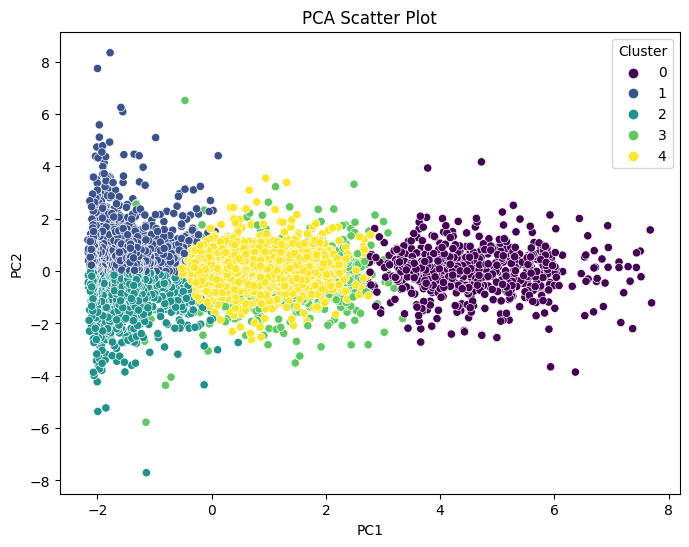

In [ ]:
# Convert the reduced data back into a pandas DataFrame
data_reduced = pd.DataFrame(data_reduced, columns=["PC" + str(i+1) for i in range(data_reduced.shape[1])])

# Add the predicted labels
data_reduced['Cluster'] = pred_labels

# Plot the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=data_reduced, palette='viridis')
plt.title('Scatter Plot')
plt.show()


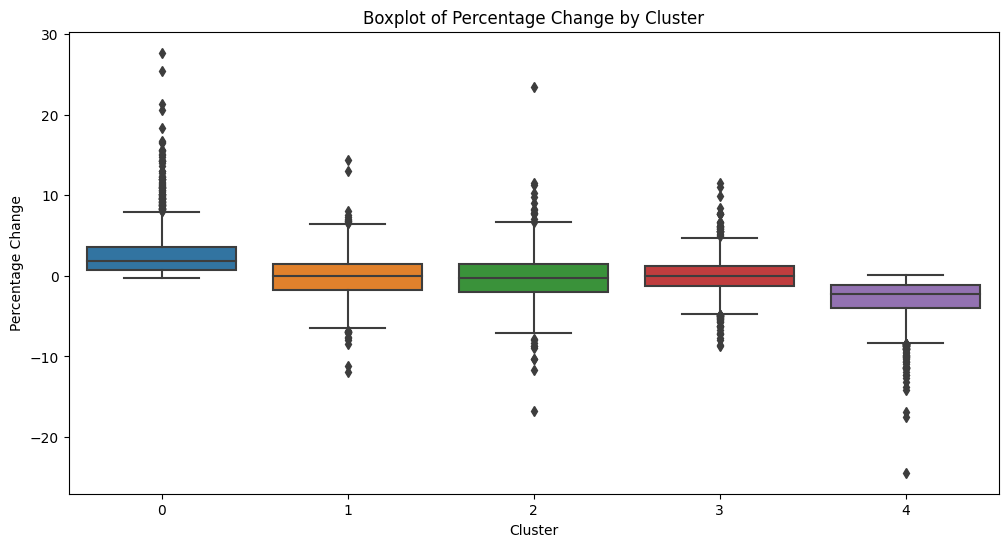

In [ ]:
#Boxplot visualization
# Add the predicted labels back to the original DataFrame
data_combined['Cluster'] = pred_labels

# Create a boxplot of Percentage Change by Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x="Cluster", y="Percentage Change", data=data_combined)
plt.title('Boxplot of Percentage Change by Cluster')
plt.show()


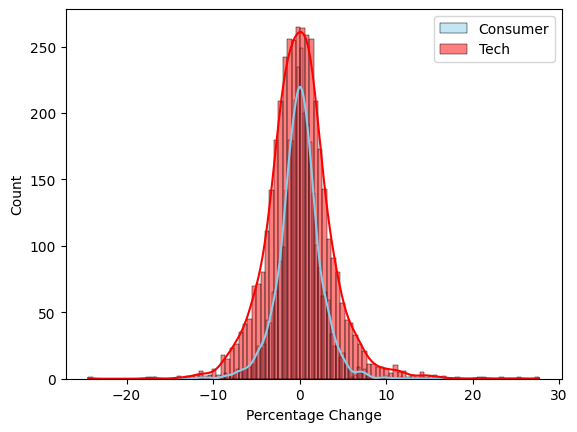

In [ ]:
# Create a histogram of the percentage changes for tech stocks
sns.histplot(data=data_combined[data_combined['Sector'] == 'Consumer'], x="Percentage Change", color="skyblue", label="Consumer", kde=True)

# Create a histogram of the percentage changes for consumer stocks
sns.histplot(data=data_combined[data_combined['Sector'] == 'Tech'], x="Percentage Change", color="red", label="Tech", kde=True)

plt.legend()
plt.show()

#Part 2


In [ ]:
#Import delle librerie
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import nltk


nltk.download('vader_lexicon')

# Load data
stock_data = pd.read_csv('stock_values_train.csv')
sentiment_data = pd.read_csv('stock_tweets_train.csv')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
stock_data

,Unnamed: 0,Date,Stock Name,Adj Close,Close,High,Low,Open,Volume
0,0,2021-09-30,AMD,102.900002,102.900002,104.440002,101.989998,102.080002,5.763670e+07
1,1,2021-10-01,AMD,102.618749,102.618749,103.540001,101.146249,102.405000,4.754601e+07
2,2,2021-10-04,AMD,101.456120,101.456120,102.677755,100.469591,102.065713,4.469963e+07
3,3,2021-10-05,AMD,101.618748,101.618748,102.766104,100.534118,101.539190,3.861303e+07
4,4,2021-10-06,AMD,102.495418,102.495418,103.179835,100.454260,101.066778,3.881197e+07
...,...,...,...,...,...,...,...,...,...
3775,3775,2022-06-24,ZS,160.449950,160.449950,162.911347,153.214692,155.147785,2.797597e+06
3776,3776,2022-06-27,ZS,161.961968,161.961968,166.442810,157.128815,161.088671,2.437118e+06
3777,3777,2022-06-28,ZS,159.145180,159.145180,166.473688,155.609290,162.073204,2.318711e+06
3778,3778,2022-06-29,ZS,157.467107,157.467107,162.344210,153.725571,158.715919,2.109947e+06


In [ ]:
sentiment_data

,Unnamed: 0,Date,Tweet,Stock Name,Company Name
0,0,2021-09-30 13:02:29+00:00,AMD Expands Collaboration With Google Cloud to...,AMD,"Advanced Micro Devices, Inc."
1,1,2021-09-30 13:02:37+00:00,$AMD expanding partnership with $GOOGL Cloud t...,AMD,"Advanced Micro Devices, Inc."
2,2,2021-09-30 17:00:16+00:00,Built by our very own @AMD Product Engineering...,AMD,"Advanced Micro Devices, Inc."
3,3,2021-09-30 19:12:12+00:00,$AMD Breakout and retest.. https://t.co/HGYKEx...,AMD,"Advanced Micro Devices, Inc."
4,4,2021-09-30 20:22:15+00:00,Read @TheNextPlatform's breakdown of our ambit...,AMD,"Advanced Micro Devices, Inc."
...,...,...,...,...,...
59976,59976,2022-06-20 05:53:18+00:00,$ZM $NIO $ZS $SE Daily \n\nHere is a handful o...,ZS,"Zscaler, Inc."
59977,59977,2022-06-20 11:30:12+00:00,Making a bold prediction! Revisit in 18 months...,ZS,"Zscaler, Inc."
59978,59978,2022-06-24 20:19:29+00:00,Here is my Portfolio Allocations at the end of...,ZS,"Zscaler, Inc."
59979,59979,2022-06-28 14:40:57+00:00,JPMorgan’s CIO software survey results highlig...,ZS,"Zscaler, Inc."


In [ ]:
#Data cleaning
#Drop unnecessary columns
stock_data = stock_data.drop(['High', 'Low', 'Adj Close', 'Unnamed: 0'], axis=1)

In [ ]:
stock_data

,Date,Stock Name,Close,Open,Volume
0,2021-09-30,AMD,102.900002,102.080002,5.763670e+07
1,2021-10-01,AMD,102.618749,102.405000,4.754601e+07
2,2021-10-04,AMD,101.456120,102.065713,4.469963e+07
3,2021-10-05,AMD,101.618748,101.539190,3.861303e+07
4,2021-10-06,AMD,102.495418,101.066778,3.881197e+07
...,...,...,...,...,...
3775,2022-06-24,ZS,160.449950,155.147785,2.797597e+06
3776,2022-06-27,ZS,161.961968,161.088671,2.437118e+06
3777,2022-06-28,ZS,159.145180,162.073204,2.318711e+06
3778,2022-06-29,ZS,157.467107,158.715919,2.109947e+06


In [ ]:
# Format dates
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.strftime('%d/%m/%Y')
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date']).dt.strftime('%d/%m/%Y')

In [ ]:
stock_data['Date']

0       30/09/2021
1       01/10/2021
2       04/10/2021
3       05/10/2021
4       06/10/2021
           ...    
3775    24/06/2022
3776    27/06/2022
3777    28/06/2022
3778    29/06/2022
3779    30/06/2022
Name: Date, Length: 3780, dtype: object

In [ ]:
sentiment_data['Date']

0        30/09/2021
1        30/09/2021
2        30/09/2021
3        30/09/2021
4        30/09/2021
            ...    
59976    20/06/2022
59977    20/06/2022
59978    24/06/2022
59979    28/06/2022
59980    30/06/2022
Name: Date, Length: 59981, dtype: object

In [ ]:
# Compute sentiment scores
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = [analyzer.polarity_scores(tweet) for tweet in sentiment_data['Tweet']]
sentiment_df = pd.DataFrame(sentiment_scores)
sentiment_data = pd.concat([sentiment_data, sentiment_df], axis=1)
sentiment_data

,Unnamed: 0,Date,Tweet,Stock Name,Company Name,neg,neu,pos,compound
0,0,30/09/2021,AMD Expands Collaboration With Google Cloud to...,AMD,"Advanced Micro Devices, Inc.",0.000,0.935,0.065,0.1027
1,1,30/09/2021,$AMD expanding partnership with $GOOGL Cloud t...,AMD,"Advanced Micro Devices, Inc.",0.000,1.000,0.000,0.0000
2,2,30/09/2021,Built by our very own @AMD Product Engineering...,AMD,"Advanced Micro Devices, Inc.",0.039,0.793,0.169,0.7846
3,3,30/09/2021,$AMD Breakout and retest.. https://t.co/HGYKEx...,AMD,"Advanced Micro Devices, Inc.",0.000,1.000,0.000,0.0000
4,4,30/09/2021,Read @TheNextPlatform's breakdown of our ambit...,AMD,"Advanced Micro Devices, Inc.",0.000,0.688,0.312,0.7717
...,...,...,...,...,...,...,...,...,...
59976,59976,20/06/2022,$ZM $NIO $ZS $SE Daily \n\nHere is a handful o...,ZS,"Zscaler, Inc.",0.000,0.870,0.130,0.3400
59977,59977,20/06/2022,Making a bold prediction! Revisit in 18 months...,ZS,"Zscaler, Inc.",0.048,0.704,0.248,0.8652
59978,59978,24/06/2022,Here is my Portfolio Allocations at the end of...,ZS,"Zscaler, Inc.",0.080,0.920,0.000,-0.4215
59979,59979,28/06/2022,JPMorgan’s CIO software survey results highlig...,ZS,"Zscaler, Inc.",0.000,0.868,0.132,0.5719


In [ ]:
# Filter tweets by compound sentiment score
filtered_sentiment_data = sentiment_data[(sentiment_data['compound'] >= 0.05) | (sentiment_data['compound'] <= -0.05)]
filtered_sentiment_data = filtered_sentiment_data.drop(['Tweet', 'Unnamed: 0', 'neg', 'neu', 'pos'], axis=1)
filtered_sentiment_data

,Date,Stock Name,Company Name,compound
0,30/09/2021,AMD,"Advanced Micro Devices, Inc.",0.1027
2,30/09/2021,AMD,"Advanced Micro Devices, Inc.",0.7846
4,30/09/2021,AMD,"Advanced Micro Devices, Inc.",0.7717
5,30/09/2021,AMD,"Advanced Micro Devices, Inc.",0.8478
7,01/10/2021,AMD,"Advanced Micro Devices, Inc.",0.8715
...,...,...,...,...
59974,06/06/2022,ZS,"Zscaler, Inc.",-0.5423
59976,20/06/2022,ZS,"Zscaler, Inc.",0.3400
59977,20/06/2022,ZS,"Zscaler, Inc.",0.8652
59978,24/06/2022,ZS,"Zscaler, Inc.",-0.4215


In [ ]:
# Merge stock and sentiment data
merged_data = pd.merge(stock_data, filtered_sentiment_data, on=['Date', 'Stock Name'])
merged_data = merged_data.groupby(['Date', 'Stock Name']).agg({'Close': 'first', 'Open': 'first', 'Volume': 'first', 'Company Name': 'first', 'compound': 'mean'}).reset_index()

In [ ]:
merged_data

,Date,Stock Name,Close,Open,Volume,Company Name,compound
0,01/02/2022,AMD,112.999637,112.086804,1.095127e+08,"Advanced Micro Devices, Inc.",0.202626
1,01/02/2022,AMZN,147.644510,146.059144,7.346359e+07,"Amazon.com, Inc.",0.323383
2,01/02/2022,GOOG,134.880892,134.322127,4.072475e+07,Alphabet Inc.,0.255706
3,01/02/2022,INTC,49.038392,48.841103,4.971076e+07,Intel Corporation,-0.377400
4,01/02/2022,META,310.835877,306.047944,2.101673e+07,"Meta Platforms, Inc.",0.201114
...,...,...,...,...,...,...,...
2375,31/12/2021,NIO,30.978114,30.227955,7.534240e+07,NIO Inc.,0.601246
2376,31/12/2021,PG,162.981537,162.745840,5.662509e+06,Procter & Gamble Company,0.508770
2377,31/12/2021,PYPL,190.004955,190.724281,8.173482e+06,"PayPal Holdings, Inc.",0.716750
2378,31/12/2021,TSLA,354.964102,356.391915,5.124456e+07,"Tesla, Inc.",0.236712


In [ ]:
# Add direction column
merged_data['Direction'] = np.where(merged_data['Close'].shift(-1) > merged_data['Close'], 'True', 'False')

In [ ]:
merged_data

,Date,Stock Name,Close,Open,Volume,Company Name,compound,Direction
0,01/02/2022,AMD,112.999637,112.086804,1.095127e+08,"Advanced Micro Devices, Inc.",0.202626,True
1,01/02/2022,AMZN,147.644510,146.059144,7.346359e+07,"Amazon.com, Inc.",0.323383,False
2,01/02/2022,GOOG,134.880892,134.322127,4.072475e+07,Alphabet Inc.,0.255706,False
3,01/02/2022,INTC,49.038392,48.841103,4.971076e+07,Intel Corporation,-0.377400,True
4,01/02/2022,META,310.835877,306.047944,2.101673e+07,"Meta Platforms, Inc.",0.201114,False
...,...,...,...,...,...,...,...,...
2375,31/12/2021,NIO,30.978114,30.227955,7.534240e+07,NIO Inc.,0.601246,True
2376,31/12/2021,PG,162.981537,162.745840,5.662509e+06,Procter & Gamble Company,0.508770,True
2377,31/12/2021,PYPL,190.004955,190.724281,8.173482e+06,"PayPal Holdings, Inc.",0.716750,True
2378,31/12/2021,TSLA,354.964102,356.391915,5.124456e+07,"Tesla, Inc.",0.236712,False


In [ ]:
# Define features and target variable
X = merged_data[['Open', 'Close', 'compound']].values
y = merged_data['Direction'].values

In [ ]:
# Split data into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, svm_pred))
precision = precision_score(y_test, svm_pred, pos_label='True')
print("SVM Precision:", precision)
cm = confusion_matrix(y_test, svm_pred)
print("SVM Confusion matrix:")
print(cm)

SVM Accuracy: 0.7668067226890757
SVM Precision: 0.7570093457943925
SVM Confusion matrix:
[[122  78]
 [ 33 243]]


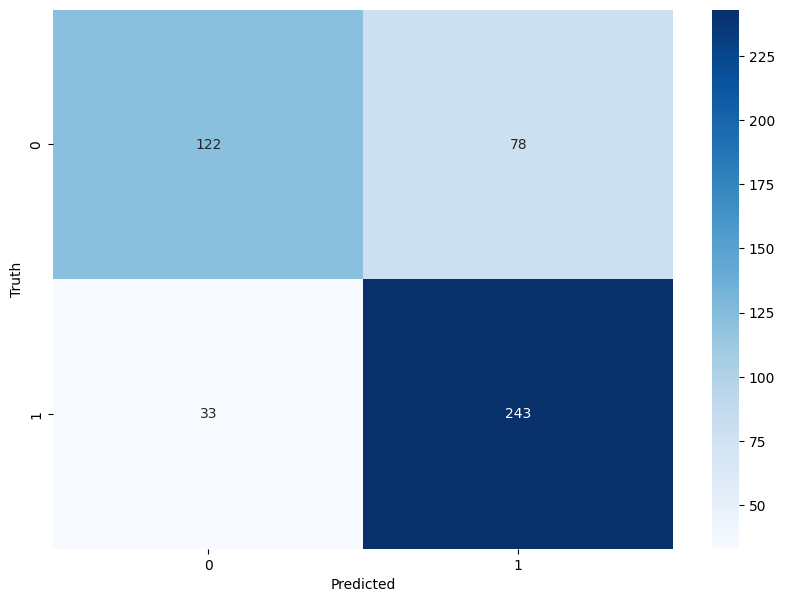

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, svm_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
print('Naive Bayes Accuracy:', accuracy_score(y_test, nb_pred))
precision = precision_score(y_test, nb_pred, pos_label='True')
print("Naive Bayes Precision:", precision)
cm = confusion_matrix(y_test, nb_pred)
print("Naive Bayes Confusion matrix:")
print(cm)

Naive Bayes Accuracy: 0.7668067226890757
Naive Bayes Precision: 0.7554179566563467
Naive Bayes Confusion matrix:
[[121  79]
 [ 32 244]]


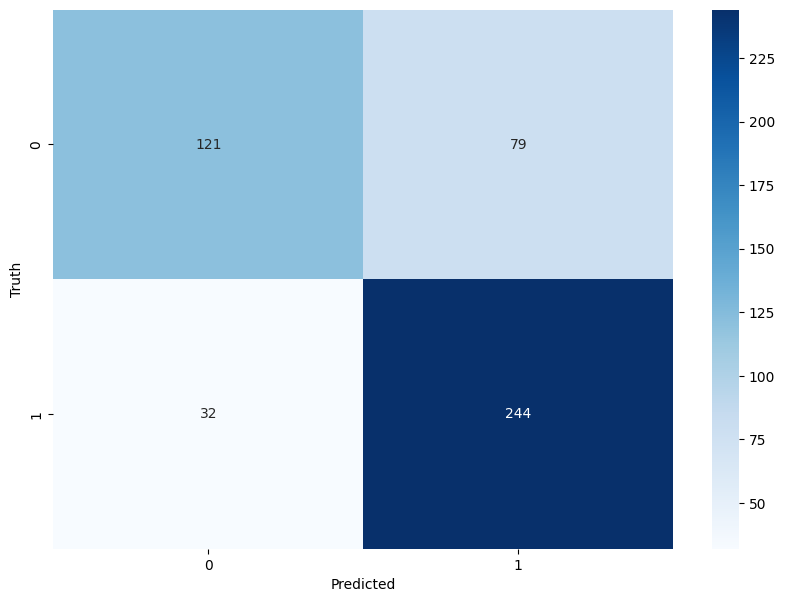

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, nb_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, rf_pred))
precision = precision_score(y_test, rf_pred, pos_label='True')
print("Random Forest Precision:", precision)
cm = confusion_matrix(y_test, rf_pred)
print("Random Forest Confusion matrix:")
print(cm)

Random Forest Accuracy: 0.7521008403361344
Random Forest Precision: 0.7668918918918919
Random Forest Confusion matrix:
[[131  69]
 [ 49 227]]


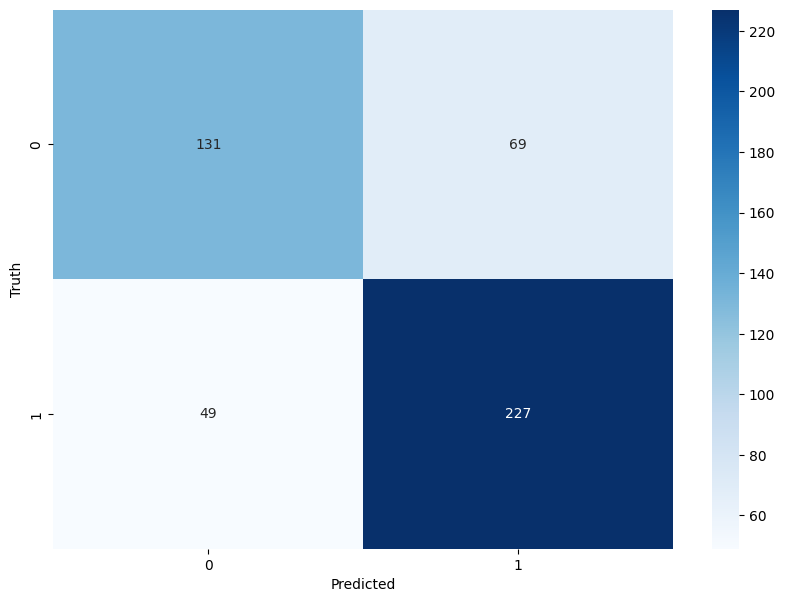

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()